# Import libraries

In [1]:
#!pip install matplotlib
#!pip install seaborn
#!pip install psycopg2

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import psycopg2
from io import StringIO
from config import config  





In [30]:
params = config()

conn = psycopg2.connect(**params)
cursor = conn.cursor()
print("Opened database successfully")



Opened database successfully


In [31]:
query = 'SELECT * FROM games OFFSET 1'
cursor.execute(query)
df = pd.read_sql_query(query, conn)
df

C:\Users\J_Cam\AppData\Local\Temp\ipykernel_7236\688855631.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,title,release_date,developer,publisher,genres,product_rating,user_score,user_ratings_count,platforms_info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,,6.9,14,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,,,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,,6.5,10,"[{'Platform': 'PC', 'Platform Metascore': '69'..."
...,...,...,...,...,...,...,...,...,...
14050,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,Rated M For Mature,8,516,"[{'Platform': 'PlayStation 3', 'Platform Metas..."
14051,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,Rated T For Teen,,,"[{'Platform': 'Nintendo Switch', 'Platform Met..."
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,Rated M For Mature,8.3,276,"[{'Platform': 'PC', 'Platform Metascore': '75'..."
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,Rated E +10 For Everyone +10,8.1,480,"[{'Platform': 'PlayStation 4', 'Platform Metas..."


## Bring the dataset from the database

In [32]:
df.head()

,title,release_date,developer,publisher,genres,product_rating,user_score,user_ratings_count,platforms_info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,,6.9,14,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,,,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,,6.5,10,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


# Description

In [33]:
df.describe()

,title,release_date,developer,publisher,genres,product_rating,user_score,user_ratings_count,platforms_info
count,14055,14055,14055,14055,14055,14055,14055,14055,14055
unique,14035,4753,4450,2308,120,7,97,1238,11956
top,,,Capcom,Nintendo,Action Adventure,Rated T For Teen,,,[]
freq,21,64,184,617,732,3835,2341,2756,29


This information is so strange for our data set because we know that there are some columns that are numeric, but the information here says that there are none.

# Data type

In [34]:
df.dtypes

title                 object
release_date          object
developer             object
publisher             object
genres                object
product_rating        object
user_score            object
user_ratings_count    object
platforms_info        object
dtype: object

Here we can look at some data types are not correctly, for example, release_date should be a 'datetime' data type but is an object, or user_score should be a float but is an object too.

# General information of the data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               14055 non-null  object
 1   release_date        14055 non-null  object
 2   developer           14055 non-null  object
 3   publisher           14055 non-null  object
 4   genres              14055 non-null  object
 5   product_rating      14055 non-null  object
 6   user_score          14055 non-null  object
 7   user_ratings_count  14055 non-null  object
 8   platforms_info      14055 non-null  object
dtypes: object(9)
memory usage: 988.4+ KB


In [36]:
count_empty = df.apply(lambda x: x.value_counts().get('', 0))

print(count_empty)

title                   21
release_date            64
developer              138
publisher              138
genres                  21
product_rating        3050
user_score            2341
user_ratings_count    2756
platforms_info           0
dtype: int64


Here we noticed that the dataset strangely has not null-values, but what happens is that in the insertion of the data we inserted all the columns in VARCHAR (strings) because it was causing us problems with the float and the integers type of data. Also the null-values did convert too in empties strings, like this: ''. So we convert this empty strings in null-values

In [37]:
df.replace('', pd.NA, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               14034 non-null  object
 1   release_date        13991 non-null  object
 2   developer           13917 non-null  object
 3   publisher           13917 non-null  object
 4   genres              14034 non-null  object
 5   product_rating      11005 non-null  object
 6   user_score          11714 non-null  object
 7   user_ratings_count  11299 non-null  object
 8   platforms_info      14055 non-null  object
dtypes: object(9)
memory usage: 988.4+ KB


### Null values

In [38]:
null_report = df.isnull().sum()

null_report

title                   21
release_date            64
developer              138
publisher              138
genres                  21
product_rating        3050
user_score            2341
user_ratings_count    2756
platforms_info           0
dtype: int64

Now we have a real information about the null values, but actually we don't need a game information without title because we don't know what the game is, so we drop these null values.

# Convert data

### In this case, we convert the 'release_date' column from object to datetime

In [39]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y', errors='coerce')

### now we convert the columns that should be integers or floats: 'user_score' and 'user_ratings_count'

In [40]:
df['user_ratings_count'] = pd.to_numeric(df['user_ratings_count'], errors='coerce').fillna(0).astype(int)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').fillna(0).astype(float)


We noticed that there are a few games without the data 'release_date', we do not drop these nulls because there is a lot of information in each row and we do not want to drop because a miss data.

### Number of rows and columns

In [41]:

num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

print(f"Type: {type(df.shape)}")


Number of rows: 14055
Number of columns: 9
Type: <class 'tuple'>


# Graphics

C:\Users\J_Cam\AppData\Local\Temp\ipykernel_7236\3141747809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df['release_date'].dt.year != 2024]['release_date'].dt.year, data=df, palette=palette)
C:\Users\J_Cam\AppData\Local\Temp\ipykernel_7236\3141747809.py:3: UserWarning: 
The palette list has fewer values (6) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[df['release_date'].dt.year != 2024]['release_date'].dt.year, data=df, palette=palette)


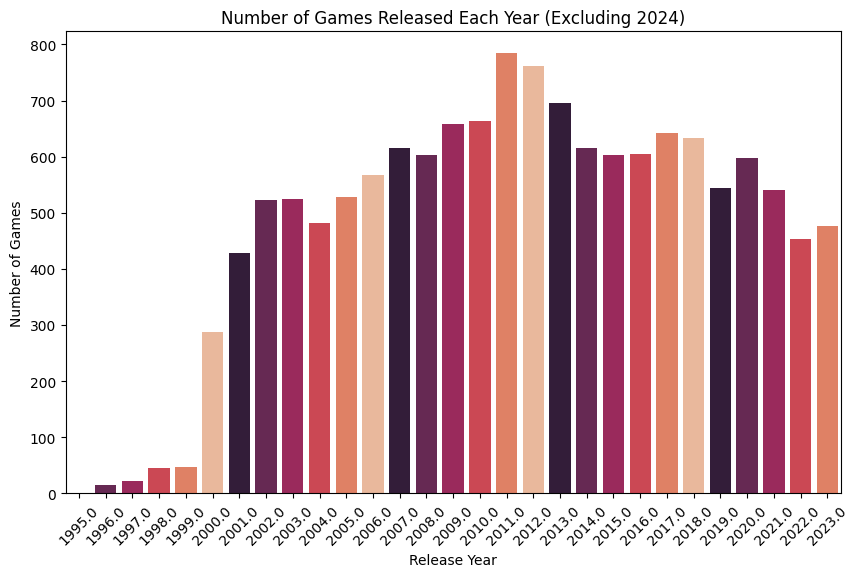

In [42]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("rocket")
sns.countplot(x=df[df['release_date'].dt.year != 2024]['release_date'].dt.year, data=df, palette=palette)
plt.title('Number of Games Released Each Year (Excluding 2024)')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

With this graph we can see which were the years with the most games and which were the years when gaming was not the most popular hobby.
We didn't take the year 2024 because there are not many games, that is because we are at the beginning of the year. (March at this moment)
An interesting observation is the growth that the games had in the interval 1999-2001.

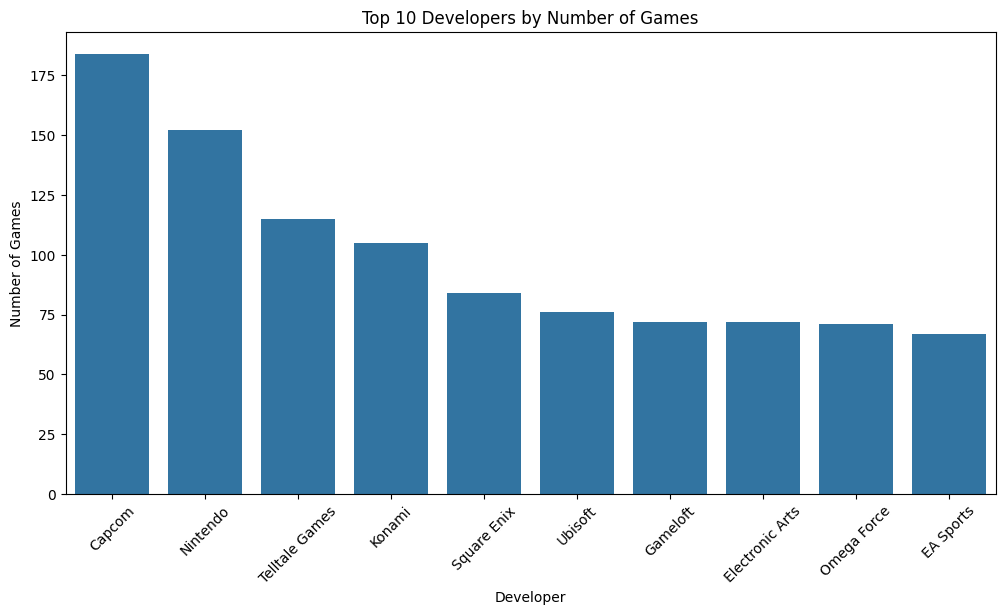

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='developer', data=df, order=df['developer'].value_counts().iloc[:10].index)
plt.title('Top 10 Developers by Number of Games')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

With this graph we can see which are the developers with more games during the last decades. 
In the first place we have Capcom, with some very popular games like Resident Evil or Street Fighters.

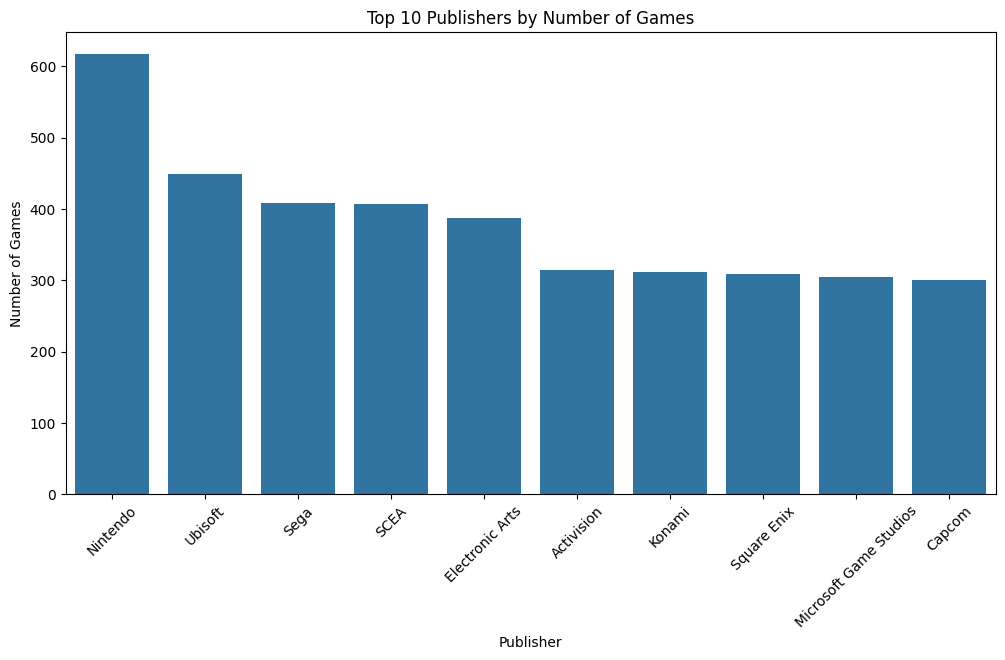

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='publisher', data=df, order=df['publisher'].value_counts().iloc[:10].index)
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


Here we noticed that the first pusblisher in quantity of games is Nintendo, a very well know company for their multiple famous games like Mario Bros.
We can observe more famous publishers like Ubisoft, Sega, or Activision.

### Unique values

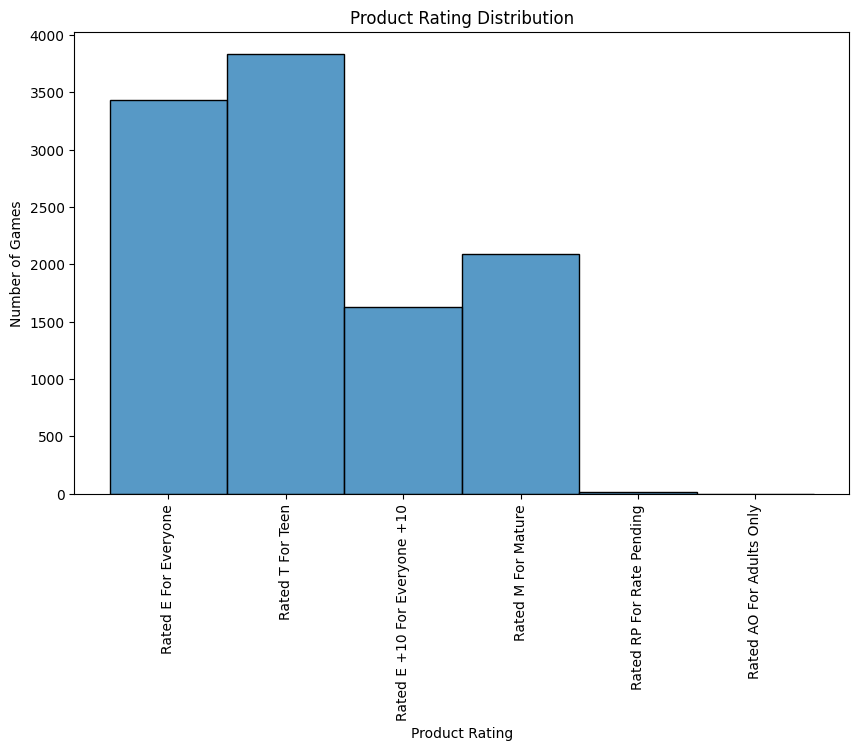

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['product_rating'].dropna(), kde=False, bins=20)
plt.title('Product Rating Distribution')
plt.xlabel('Product Rating')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)  
plt.show()

In this graph we can observe that the most common is make games for teen people, but something interesting is the few games that are rated AO (For Adults Only), we could conclude that this is because their largest audience is teenagers, so making games for adults only would not be of much benefit to them.

# Table creation for the clean data and export to database

In [46]:
df.dtypes

title                         object
release_date          datetime64[ns]
developer                     object
publisher                     object
genres                        object
product_rating                object
user_score                   float64
user_ratings_count             int32
platforms_info                object
dtype: object

In [47]:
replacements = {
    'object': 'varchar',
    'float64': 'float',
    'int32': 'int',
    'datetime64[ns]': 'timestamp'
}
replacements

{'object': 'varchar',
 'float64': 'float',
 'int32': 'int',
 'datetime64[ns]': 'timestamp'}

In [48]:
col_str = ", ".join("{} {}".format(n, d) for (n, d) in zip(df.columns, df.dtypes.replace(replacements)))
col_str

'title varchar, release_date timestamp, developer varchar, publisher varchar, genres varchar, product_rating varchar, user_score float, user_ratings_count int, platforms_info varchar'

In [49]:
cursor.execute("DROP TABLE IF EXISTS games_clean;")

In [50]:
cursor.execute("CREATE TABLE IF NOT EXISTS games_clean (title varchar, release_date timestamp, developer varchar, publisher varchar, genres varchar, product_rating varchar, user_score float, user_ratings_count int, platforms_info varchar);")
conn.commit()

In [51]:
temp_file = StringIO()

df.to_csv(temp_file, sep='\t', header=False, index=False)
temp_file.seek(0)

try:
    cursor.copy_from(temp_file, 'games_clean', null='', sep='\t')
    conn.commit()
    print("Tabla games_clean creada correctamente.")
except Exception as e:
    print(f"Error al crear la tabla games_clean: {e}")
conn.commit()

conn.close()

Tabla games_clean creada correctamente.


Here we transform the changes of our df in a temp file to copy the dataset from the csv to a sql table, we did this because psycopg2 is not compatible with the to_sql function, so we decide done this way.